# Stacked histogram reading
## and extracting MC / data to get KL divergences

In [1]:
import uproot4 as uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.fira, hep.style.firamath])

In [2]:
from scipy.stats import entropy

In [3]:
test_histo = uproot.open('/nfs/dust/cms/user/anstein/ctag_condor/systPlots_210629_2017_flat_200_gamma25.0_alphaNone/Plots_210629_flat_200_gamma25.0_alphaNone_minimal_Custom/output_2017_PFNano_central/DY_m_jet_CustomCvsB_0_.root')

In [4]:
test_histo

<ReadOnlyDirectory '/' at 0x7f6562f20fd0>

In [5]:
test_histo.keys()

['DYJets_lep;1',
 'DYJets_uds;1',
 'DYJets_b;1',
 'DYJets_c;1',
 'c;1',
 'b;1',
 'uds;1',
 'lep;1',
 'MCSum;1',
 'Data;1']

In [6]:
test_histo['MCSum']

<TH1D (version 3) at 0x7f6562f3c9d0>

In [7]:
for v in test_histo['MCSum'].values():
    print(v)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
18290.398130126105
2097.754270182098
1361.3118074932354
1281.0097415509474
1454.7326103071184
1975.8270403471038
2124.298786037758
2206.980504623118
2400.328132196969
2598.288917991997
3052.838208331864
3470.320236837611
4119.724345028243
5334.681436935227
7036.149197000181
9076.462957687902
11563.887363754762
14733.995279003202
17907.948436417322
21804.422213963164
26344.672274487522
31647.37057706173
38375.70223666776
55570.72993986644
53916.91701749561
54530.65022106876
59449.4020796978
66420.75913151627
74774.13325048643
83481.09138792168
86738.62732970921
87781.47612919852
84754.1236232191
80568.80636977071
75170.34911279756
69546.26598422471
64982.67025499601
61187.060094086584
59543.79702789494
58790.27829499729
56144.5914499504
47682.24583450499
33032.79821192068
15230.833769693538
3349.690264417869
183.25350088497248
2.3450156472474086
0.0
0.0
0.0
0.0


In [8]:
for v in test_histo['Data'].values():
    print(v)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
15511.0
2015.0
1382.0
1258.0
1401.0
1913.0
2057.0
2191.0
2393.0
2626.0
2987.0
3513.0
4362.0
5616.0
7863.0
10284.0
13098.0
16631.0
20582.0
25221.0
31107.0
37584.0
45848.0
63921.0
63917.0
64934.0
69948.0
77308.0
83512.0
90218.0
90766.0
88075.0
82272.0
76094.0
69450.0
62858.0
57942.0
54647.0
51756.0
49479.0
44527.0
34557.0
20458.0
7627.0
1315.0
65.0
3.0
0.0
0.0
0.0
0.0


In [9]:
entropy([v for v in test_histo['Data'].values()] , qk=[v for v in test_histo['MCSum'].values()])

0.012581640597513094

#### The actual implementation for several epochs / outputs

In [28]:
epochs = [200]  # add the ones for which StackPlotter results exist
kl_divs_all = []
for i,e in enumerate(epochs):
    kl_divs = []
    for disc in ['Prob_b','Prob_bb','Prob_c','Prob_l','BvsL', 'BvsC', 'CvsB', 'CvsL']:  # select thos that exist for paths listed below
        histo = uproot.open(f'/nfs/dust/cms/user/anstein/ctag_condor/systPlots_210629_2017_flat_{e}_gamma25.0_alphaNone/Plots_210629_flat_{e}_gamma25.0_alphaNone_minimal_Custom/output_2017_PFNano_central/DY_m_jet_Custom{disc}_0_.root')
        num, denom = histo['Data'].values(), histo['MCSum'].values()
        #rint(num, denom)
        denom[(denom == 0) & (num != 0)] = 0.00001
        #rint(num, denom)
        kl_divs.append(entropy([v for v in num] , qk=[v for v in denom]))
    print(kl_divs)
    kl_divs_all.append(kl_divs)
kl_divs_all = np.array(kl_divs_all)

[0.013904009071008326, 0.006211246400665231, 0.008261965160216225, 0.016916355778145552, 0.014897218198282217, 0.012581595910135057, 0.012581640597513094, 0.014375682013595681]


Text(0, 1, 'KL divergence')

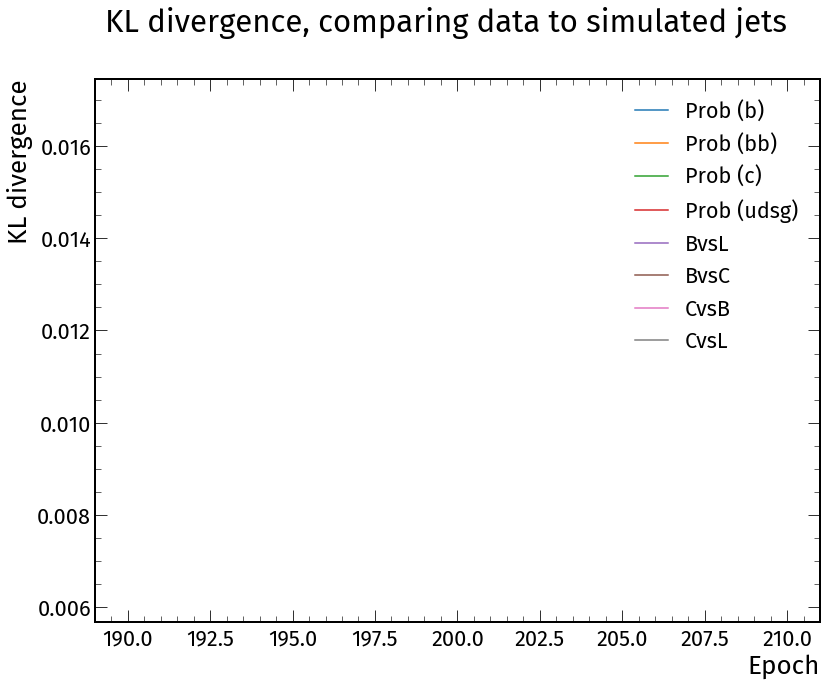

In [14]:
fig = plt.figure(1,figsize=[13,10])
plt.plot(epochs, kl_divs_all[:,0],label='Prob (b)')
plt.plot(epochs, kl_divs_all[:,1],label='Prob (bb)')
plt.plot(epochs, kl_divs_all[:,2],label='Prob (c)')
plt.plot(epochs, kl_divs_all[:,3],label='Prob (udsg)')
plt.plot(epochs, kl_divs_all[:,4],label='BvsL')
plt.plot(epochs, kl_divs_all[:,5],label='BvsC')
plt.plot(epochs, kl_divs_all[:,6],label='CvsB')
plt.plot(epochs, kl_divs_all[:,7],label='CvsL')
plt.legend()
fig.suptitle('KL divergence, comparing data to simulated jets')
plt.xlabel('Epoch')
plt.ylabel('KL divergence')

In [30]:
epochs = [200]  # add the ones for which StackPlotter results exist
kl_divs_all_adv = []
for i,e in enumerate(epochs):
    kl_divs_adv = []
    for disc in ['Prob_b','Prob_bb','Prob_c','Prob_l','BvsL', 'BvsC', 'CvsB', 'CvsL']:  # select thos that exist for paths listed below
        histo = uproot.open(f'/nfs/dust/cms/user/anstein/ctag_condor/systPlots_210708_2017_notflat_{e}_gamma25.0_alphaNone_adv_tr_eps0.01/Plots_210708_notflat_{e}_gamma25.0_alphaNone_adv_tr_eps0.01_minimal_Custom/output_2017_PFNano_central/DY_m_jet_Custom{disc}_0_.root')
        num, denom = histo['Data'].values(), histo['MCSum'].values()
        #rint(num, denom)
        denom[(denom == 0) & (num != 0)] = 0.00001
        #rint(num, denom)
        kl_divs_adv.append(entropy([v for v in num] , qk=[v for v in denom]))
    print(kl_divs_adv)
    kl_divs_all_adv.append(kl_divs_adv)
kl_divs_all_adv = np.array(kl_divs_all_adv)

[0.014381003645962367, 0.004589501957013404, 0.0055274346337418345, 0.01764655305735733, 0.013711827448384426, 0.01057359089565336, 0.010573586710737893, 0.006814351108311328]


In [25]:
uproot.open('/nfs/dust/cms/user/anstein/ctag_condor/systPlots_210708_2017_notflat_200_gamma25.0_alphaNone_adv_tr_eps0.01/Plots_210708_notflat_200_gamma25.0_alphaNone_adv_tr_eps0.01_minimal_Custom/output_2017_PFNano_central/DY_m_jet_CustomBvsL_0_.root')

<ReadOnlyDirectory '/' at 0x7f655ab61bb0>